In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk import bigrams, trigrams
import math
import pandas as pd
import numpy as np

In [24]:
f = open('full_text.txt', 'r')
lines = f.read()
f.close()

In [25]:
paragraphs = lines.split('\n')

In [50]:
tokenizer = RegexpTokenizer("[\w’]+", flags=re.UNICODE)
stopwords = []
 
def freq(word, doc):
    return doc.count(word)
 
 
def word_count(doc):
    return len(doc)
 
 
def tf(word, doc):
    return (freq(word, doc) / float(word_count(doc)))
 
 
def num_docs_containing(word, list_of_docs):
    count = 0
    for document in list_of_docs:
        if freq(word, document) > 0:
            count += 1
    return 1 + count
 
 
def idf(word, list_of_docs):
    return math.log(len(list_of_docs) /
            float(num_docs_containing(word, list_of_docs)))
 
 
def tf_idf(word, doc, list_of_docs):
    return (tf(word, doc) * idf(word, list_of_docs))
 
#Compute the frequency for each term.
vocabulary = []
docs = {}
all_tips = []
for p in paragraphs:
    tokens = tokenizer.tokenize(p)
    bi_tokens = bigrams(tokens)
    tri_tokens = trigrams(tokens)
    tokens = [token.lower() for token in tokens if len(token) > 2]
    tokens = [token for token in tokens if token not in stopwords]
    bi_tokens = [' '.join(token).lower() for token in bi_tokens]
    bi_tokens = [token for token in bi_tokens if token not in stopwords]
    tri_tokens = [' '.join(token).lower() for token in tri_tokens]
    tri_tokens = [token for token in tri_tokens if token not in stopwords]
    
    final_tokens = []
    final_tokens.extend(tokens)
    final_tokens.extend(bi_tokens)
    final_tokens.extend(tri_tokens)
    docs[p] = {'freq': {}, 'tf': {}, 'idf': {}, 'tf-idf': {}, 'tokens': []}
 
    for token in final_tokens:
        docs[p]['freq'][token] = freq(token, final_tokens)
        docs[p]['tf'][token] = tf(token, final_tokens)
        docs[p]['tokens'] = final_tokens
 
    vocabulary.append(final_tokens)

for doc in docs:
    for token in docs[doc]['tf']:
        #The Inverse-Document-Frequency
        docs[doc]['idf'][token] = idf(token, vocabulary)
        #The tf-idf
        docs[doc]['tf-idf'][token] = tf_idf(token, docs[doc]['tokens'], vocabulary)
 
#Now let's find out the most relevant words by tf-idf.
words = {}
for doc in docs:
    for token in docs[doc]['tf-idf']:
        if token not in words:
            words[token] = docs[doc]['tf-idf'][token]
        else:
            if docs[doc]['tf-idf'][token] > words[token]:
                words[token] = docs[doc]['tf-idf'][token]

In [51]:
df = pd.DataFrame(words.items())
df.columns = ['token', 'tfidf']
df.sort('tfidf', ascending=False, inplace=True)
df

,token,tfidf
5421,esp,2.564949
2954,biological design arguments,0.543016
405,biological design,0.543016
270,cosmological design,0.543016
5915,cosmological design arguments,0.543016
1947,the bible code,0.543016
6535,cosmological,0.543016
3175,design arguments,0.475439
487,bible code,0.475439
4604,biological,0.475439


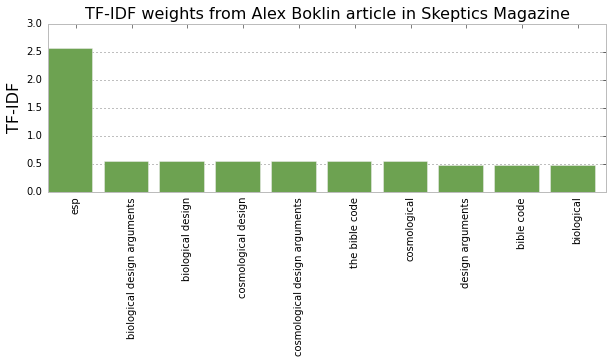

In [52]:
df2 = df[0:10].copy()
fig = plt.figure(figsize=(10,3))
#ticks = df['tick']
x = np.arange(df2.shape[0])
plt.bar(x, df2.tfidf, color='#6da251')
plt.xticks(x + 0.5, df2.token.tolist(), rotation=90)
plt.ylabel('TF-IDF', fontsize=16)
plt.title('TF-IDF weights from Alex Boklin article in Skeptics Magazine', fontsize=16)
plt.gca().xaxis.grid(False)
plt.savefig('alex.png',bbox_inches='tight')
plt.show()